In [1]:
import sys
#add the path were the models are
sys.path.append("../inProduction/")
sys.path.append("../main/")
import pandas as pd
import numpy as np
from functools import reduce
from modelos import SIR, EXP
from bootstrap import bootstrapTS as bsTS
import matplotlib.pyplot as plt
#set default theme for plts
import time

In [2]:
ci = bsTS()

In [3]:
data = pd.read_csv("../data/dadosCovid.csv")
data.head()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


In [4]:
#Select only Sao Paulo
sp = data[data["estado"] == "SP"]
#Remove missing values to not crash the intervals
sp = sp.dropna()
sp.head()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
1501,Sudeste,SP,2020-02-26,1,1,0,0
1502,Sudeste,SP,2020-02-27,0,1,0,0
1503,Sudeste,SP,2020-02-28,0,1,0,0
1504,Sudeste,SP,2020-02-29,1,2,0,0
1505,Sudeste,SP,2020-03-01,0,2,0,0


In [5]:
#create a series with the cummulative number of cases
y = np.array(sp["casosAcumulados"])

#Give the number of days since the day of first case confirmed
x = range(0,len(sp["casosAcumulados"]))

<h1>Exponencial Model</h1>

In [6]:
exp = EXP(50000000)

In [7]:
results = ci.single_core_CI(model = exp, 
                            y = y, 
                            x = x, 
                            ndays = 7,
                            bootstrap = 20, 
                            simulation = "Gamma_Poisson", 
                            method = "approximation",
                            model_name = "exponencial")

pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.399
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.283
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.369
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.405
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.429
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.291
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.3
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.369
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.274
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.267
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.439
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.428
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.321
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.443
pyswarms.single.global

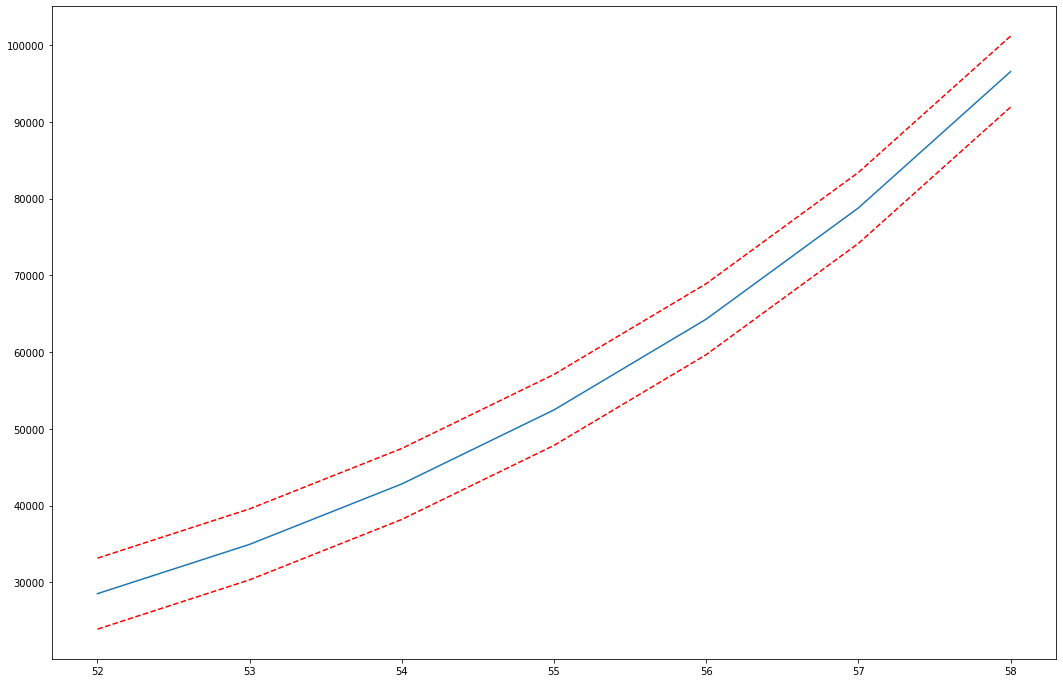

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18,12))
axes.plot(range(52,59), results[2][52:])
axes.plot(range(52,59), results[3], "--", c = "red")
axes.plot(range(52,59), results[4], "--", c = "red")

In [9]:
results[2][58] - results[4][6]

-4623.42419710508

In [10]:
results = ci.single_core_CI(model = exp, 
                            y = y, 
                            x = x, 
                            ndays = 7,
                            bootstrap = 20, 
                            simulation = "Normal", 
                            method = "approximation",
                            model_name = "exponencial")

pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.3 
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.82 
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.98
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.741
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.758
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.8
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.784
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.779
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.963
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.984
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.777
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.824
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.788
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.803
pyswarms.single.global_b

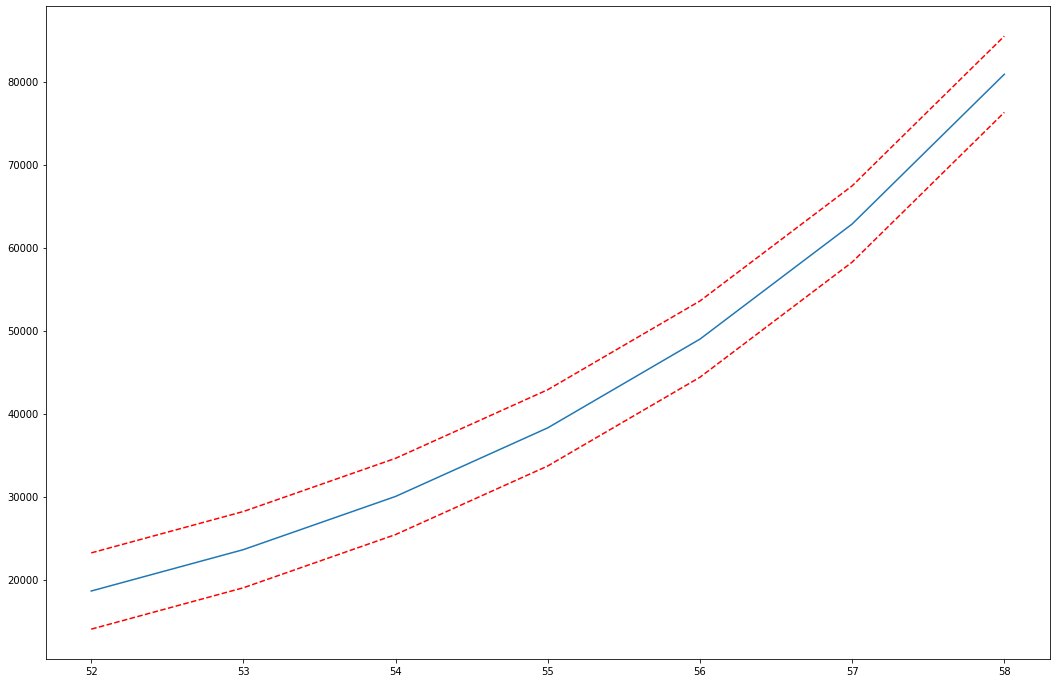

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18,12))
axes.plot(range(52,59), results[2][52:])
axes.plot(range(52,59), results[3], "--", c = "red")
axes.plot(range(52,59), results[4], "--", c = "red")

In [12]:
results[2][58] - results[4][6]

-4592.771020515414

<h1>SIR with beta variante</h1>

In [13]:
sir = SIR(50000000)

In [ ]:
results = ci.single_core_CI(model = sir, 
                             y = y, 
                             x = x, 
                             ndays = 7,
                             bootstrap = 2, 
                             simulation = "Gamma_Poisson", 
                             method = "approximation",
                             model_name = "SIR")

pyswarms.single.local_best:   0%|          |0/500../main/modelos.py:262: RuntimeWarning: overflow encountered in exp
  h = 1.0/(1.0+ np.exp(-2.0*50*t))
pyswarms.single.local_best: 100%|██████████|500/500, best_cost=5.85e+4
pyswarms.single.local_best:  47%|████▋     |236/500, best_cost=6.48e+4

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18,12))
axes.plot(range(52,59), results[4][52:])
axes.plot(range(52,59), results[5], "--", c = "red")
axes.plot(range(52,59), results[6], "--", c = "red")

In [ ]:
results[4][59] - results[6][6]